# SPRINT 2
Analistes de Finances i Risc Crediticio: Els clients amb préstecs i hipoteques tendeixen a tenir un 
saldo mitjà més baix o més risc d'incompliment? Com hauríem d'ajustar les nostres ofertes i 
estratègies de gestió de riscos en funció d'aquestes troballes?

CATEGORICAS : LOAN / HOUSING / DEFAULT

NUMÉRICAS : BALANCE / (%DEFAULT en cada categoria)

In [2]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
%pip install pymysql
import pymysql
#Dades de connexió

usuario='EquipoB'
contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

#Crear l'engine de SQLAlchemy
try:
    engine=create_engine(url_conexion)
    cnx=engine.connect()
    print("conexió correcta")
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Obtenir nom de les taules
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()


#Emmagatzemar el DataFrames en una llista
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")

#cnx.close()

Note: you may need to restart the kernel to use updated packages.
conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.


In [3]:
df_bank = df['BANK_marketing131024']

df_finanzas = df_bank[['id','age','job','marital','education','default','balance','housing','loan']]
df_finanzas.head()


,id,age,job,marital,education,default,balance,housing,loan
0,1,59,admin.,married,secondary,0,2343,1,0
1,2,59,admin.,married,secondary,0,2343,1,0
2,3,56,admin.,married,secondary,0,45,0,0
3,4,41,technician,married,secondary,0,1270,1,0
4,5,55,services,married,secondary,0,2476,1,0


In [4]:
df_finanzas.describe()

,id,age,default,balance,housing,loan
count,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000
mean,9696.799233,41.262699,0.014911,1527.209924,0.472932,0.132772
std,6754.310906,11.961480,0.121199,3242.089071,0.499282,0.339339
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000
25%,4041.500000,32.000000,0.000000,123.000000,0.000000,0.000000
50%,8082.000000,39.000000,0.000000,543.000000,0.000000,0.000000
75%,17342.500000,49.000000,0.000000,1717.000000,1.000000,0.000000
max,21383.000000,95.000000,1.000000,81204.000000,1.000000,1.000000


In [5]:
df_finanzas.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
dtype: int64

In [6]:
df_finanzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16163 non-null  int64 
 1   age        16163 non-null  int64 
 2   job        16163 non-null  object
 3   marital    16163 non-null  object
 4   education  16163 non-null  object
 5   default    16163 non-null  int64 
 6   balance    16163 non-null  int64 
 7   housing    16163 non-null  int64 
 8   loan       16163 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [7]:
df_finanzas['loan'].value_counts()

loan
0    14017
1     2146
Name: count, dtype: int64

In [8]:
df_finanzas['loan'].isnull().sum()

0

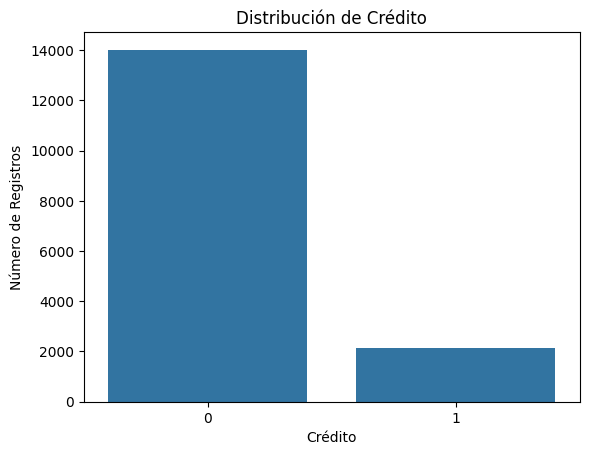

In [9]:
sns.countplot(x='loan', data= df_finanzas)
plt.title('Distribución de Crédito')
plt.xlabel('Crédito')
plt.ylabel('Número de Registros')
plt.show()


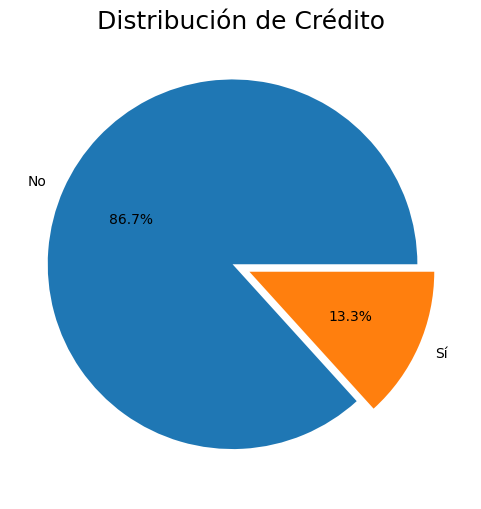

In [10]:
compteig_faltante= df_finanzas['loan'].value_counts()
plt.figure(figsize=(6,6))
explode = (0.05, 0.05)
plt.pie(compteig_faltante,labels=["No", "Sí"], autopct='%1.1f%%', explode= explode)
plt.title("Distribución de Crédito", fontsize=18 )
plt.show()

y seguiré viendo prestamos en funcion de saldo e incumplimiento con un par de graficos de densidad (de prestamos) con hue (de saldo y de incumplimiento) ¿Te parece?

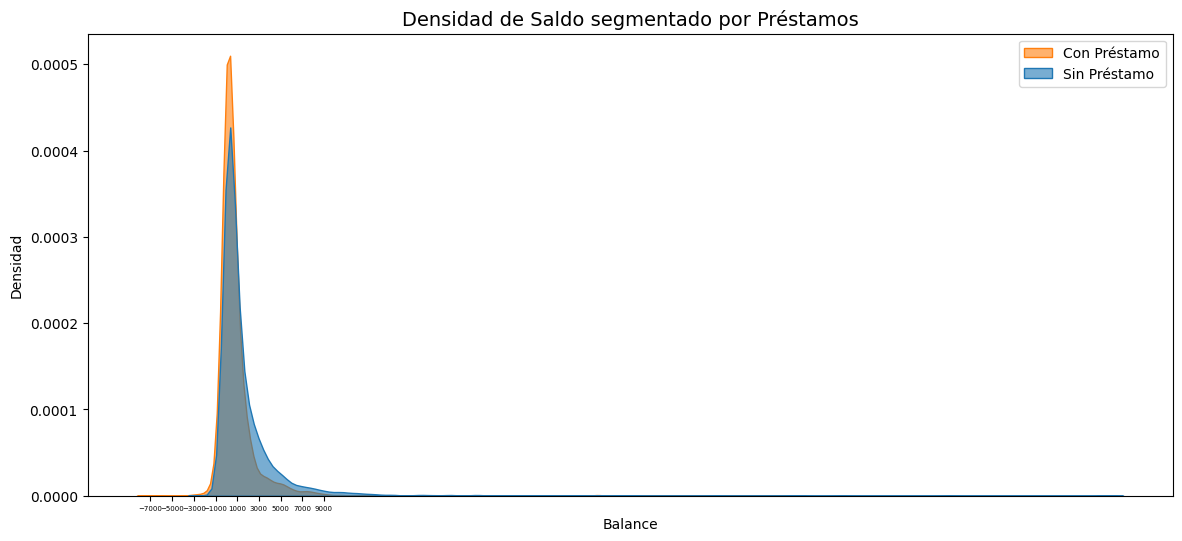

In [15]:
plt.figure(figsize=(14, 6))

sns.kdeplot(data=df_finanzas, x='balance', hue='loan', fill=True, common_norm=False, alpha=0.6)

plt.title('Densidad de Saldo segmentado por Préstamos',fontsize=14)
plt.xlabel('Balance')
plt.ylabel('Densidad')
plt.legend (labels=["Con Préstamo", "Sin Préstamo"])


plt.xticks(range(-7000,10000,2000), fontsize=5)

plt.show()

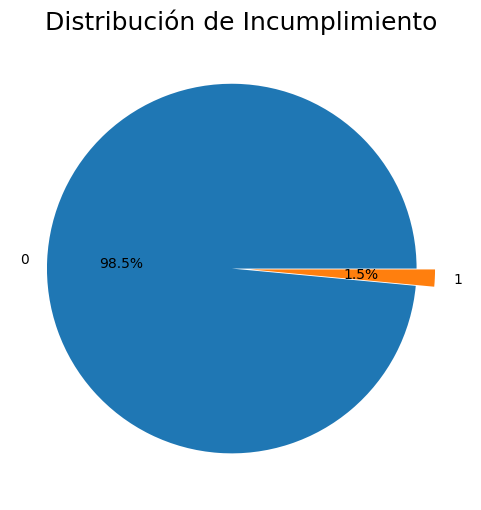

In [15]:
compteig_faltante= df_finanzas['default'].value_counts()
plt.figure(figsize=(6,6))
explode = (0.05, 0.05)
plt.pie(compteig_faltante,labels=compteig_faltante.index, autopct='%1.1f%%', explode= explode)
plt.title("Distribución de Incumplimiento", fontsize=18 )
plt.show()

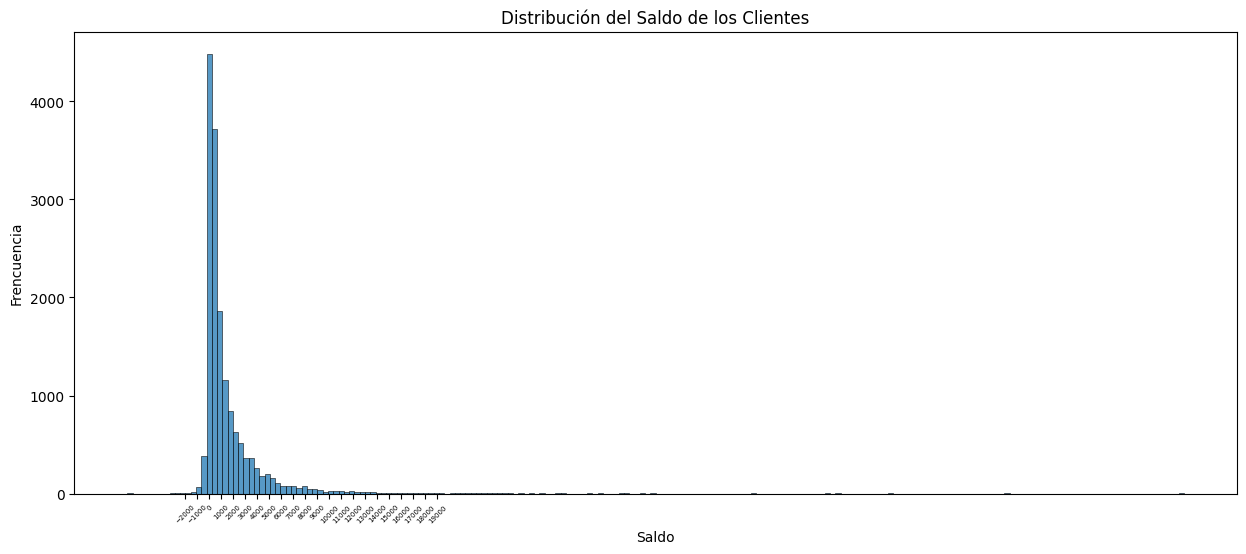

In [16]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df_finanzas, x='balance', bins=200)

plt.title('Distribución del Saldo de los Clientes')
plt.xlabel('Saldo')
plt.ylabel('Frencuencia')
plt.xticks(range(-2000,20000,1000), fontsize= 5, rotation= 45)
plt.show()

# 2. COMPARACIÓN ENTRE VARIABLES

In [17]:
def clasificacion_clientes (housing, loan):
    if housing == 1 and loan == 1:
        return "Hsi_Lsi"
    elif housing == 1 and loan == 0:
        return "Hsi_Lno"
    elif housing == 0 and loan == 1:
        return "Hno_Lsi"
    elif housing == 0 and loan == 0:
        return "Hno_Lno"
    else:
        return "No categorizado" # no deberíamos tener clientes en esta categoria
    
    
# para clasificar a los clientes segun los dos parametros utilizados en la funcion: 
# df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)

df_finanzas["categoria_cliente"] = df_finanzas.apply(lambda x: clasificacion_clientes(x.housing, x.loan), axis=1)


C:\Users\ueret\AppData\Local\Temp\ipykernel_440\3304996542.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas["categoria_cliente"] = df_finanzas.apply(lambda x: clasificacion_clientes(x.housing, x.loan), axis=1)


In [ ]:
#df_vistaf['faltante']= df_vistaf['faltante'].replace({"no":0,"si":1})

In [6]:
Hno_Lno = 1868.09 # Valor de control
Hsi_Lno = 1359.35
Hno_Lsi = 877.98
Hsi_Lsi = 783.29
# Calculo de la variación en %
Variación_Hsi_Lno = (( Hsi_Lno - Hno_Lno ) / Hno_Lno) * 100
Variación_Hno_Lsi = (( Hno_Lsi - Hno_Lno ) / Hno_Lno) * 100
Variación_Hsi_Lsi = (( Hsi_Lsi - Hno_Lno ) / Hno_Lno) * 100

Variación_Hsi_Lno,Variación_Hno_Lsi,Variación_Hsi_Lsi

(-27.2331632844242, -53.00119373263601, -58.07000733369377)

In [7]:
Hno_Lno = 0.92 # Valor de control
Hsi_Lno = 1.37
Hno_Lsi = 5.27
Hsi_Lsi = 2.79
# Calculo de la variación en %
Variación_Hsi_Lno = (( Hsi_Lno - Hno_Lno ) / Hno_Lno) * 100
Variación_Hno_Lsi = (( Hno_Lsi - Hno_Lno ) / Hno_Lno) * 100
Variación_Hsi_Lsi = (( Hsi_Lsi - Hno_Lno ) / Hno_Lno) * 100

Variación_Hsi_Lno,Variación_Hno_Lsi,Variación_Hsi_Lsi

(48.913043478260875, 472.8260869565217, 203.26086956521738)